# Name - Sourav Kumar Singh

# Batch - DS2401

# Project Insurance claim fraud detection

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Importing Datasets

In [2]:
# DATABASE OF Insurance
df =pd.read_csv("C:/users/ssour/OneDrive/Documents/Insurance_claim.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insure_zip,...,witnesses,police_report_avialble,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_report
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
df.drop(columns=["policy_bind_date"], inplace=True)
df.drop(columns=["incident_date mapping"], inplace=True)

In these datasets we predict insurance claim is it right or not

In [4]:
# Here we can see that top 5 data
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insure_zip,insured_sex,...,witnesses,police_report_avialble,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_report
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
# Here we can see that last 5 data
df.tail()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insure_zip,insured_sex,...,witnesses,police_report_avialble,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Fraud_report
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,OH,250/500,1000,766.19,0,612260,FEMALE,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [6]:
# Here we can see all columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insure_zip', 'insured_sex',
       'insured_education_level', 'insured_ocucpation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collisiom_type', 'incient_sverity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_avialble', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'Fraud_report'],
      dtype='object')

# Exploratory Data Analysis

In [7]:
# Now we check the how many rows and columns 
df.shape

(1000, 38)

Here we can clear see that there is 1000 rows and 39 columns contains in these datasets

In [8]:
print("The dimensions of datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The dimensions of datasets:  (1000, 38)
The columns of the datasets:  Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insure_zip', 'insured_sex',
       'insured_education_level', 'insured_ocucpation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collisiom_type', 'incient_sverity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_avialble', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'Fraud_report'],
      dtype='object')


In [9]:
# deecribe the data
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insure_zip,capital_gains,capital_loss,incident_hour,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [10]:
# Now we checking null values 
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insure_zip                     0
insured_sex                    0
insured_education_level        0
insured_ocucpation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collisiom_type                 0
incient_sverity                0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour                  0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_avialble         0
total_clai

Here you can see that no null vlaues is presnet in these datasets

In [11]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


155

<Axes: >

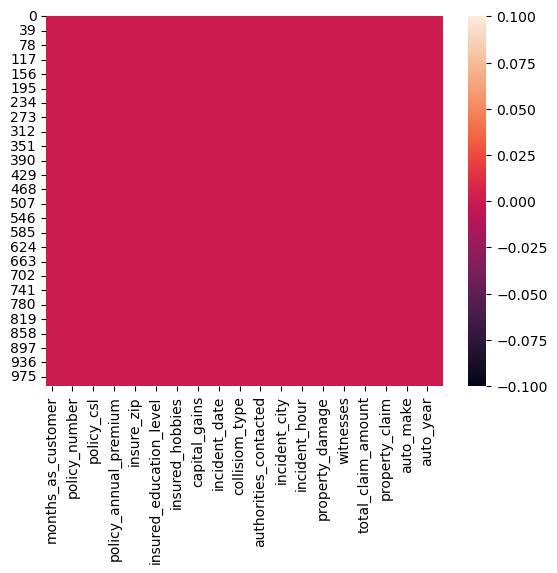

In [12]:
# Now check null values using heatmap
sns.heatmap(df.isnull())

In [13]:
df.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insure_zip  \
0                 1000                

In [14]:
# Now separating categorical columns and numercial columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical_col :",categorical_col)

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Categorical_col : ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_ocucpation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collisiom_type', 'incient_sverity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_avialble', 'auto_make', 'auto_model', 'Fraud_report']
Numercial_col : ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insure_zip', 'capital_gains', 'capital_loss', 'incident_hour', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [15]:
# Now we checking the number of uniques values
df.nunique().to_frame("No. of uniques values")

,No. of uniques values
months_as_customer,391
age,46
policy_number,1000
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insure_zip,995
insured_sex,2


# Now we check unique values

In [16]:
df["policy_state"].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [17]:
df["policy_csl"].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [18]:
df["policy_deductable"].unique()

array([1000, 2000,  500], dtype=int64)

In [19]:
df["umbrella_limit"].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [20]:
df["insured_sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [21]:
df["insured_education_level"].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [22]:
df["insured_ocucpation"].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [23]:
df["insured_hobbies"].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [24]:
df["insured_relationship"].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [25]:
df["incident_type"].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [26]:
df["collisiom_type"].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [27]:
df["incient_sverity"].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [28]:
df["authorities_contacted"].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [29]:
df["incident_state"].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [30]:
df["incident_city"].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [31]:
df["number_of_vehicles_involved"].unique()

array([1, 3, 4, 2], dtype=int64)

In [32]:
df["property_damage"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [33]:
df["bodily_injuries"].unique()

array([1, 0, 2], dtype=int64)

In [34]:
df["witnesses"].unique()

array([2, 0, 3, 1], dtype=int64)

In [35]:
df["police_report_avialble"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [36]:
df["auto_make"].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [37]:
df["auto_model"].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [38]:
df["auto_year"].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [39]:
df["Fraud_report"].unique()

array(['Y', 'N'], dtype=object)

# Data Visualization

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


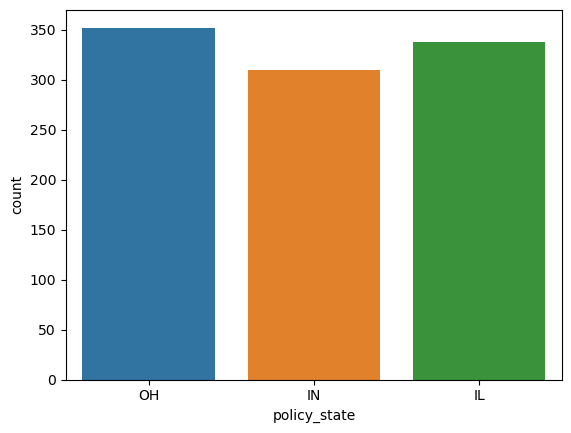

In [40]:
# visualize the number of  policy_state
ax=sns.countplot(x='policy_state',data=df)
print(df['policy_state'].value_counts())

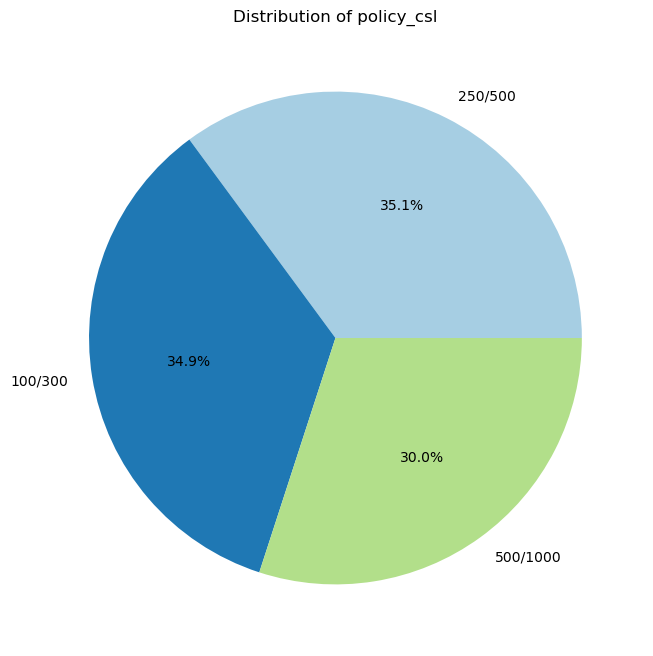

In [41]:
# Assuming df is your DataFrame and it has a column named 'policy_csl'
policy_csl = df["policy_csl"].value_counts()

plt.figure(figsize=(10,8))
policy_csl.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of policy_csl")
plt.ylabel("")  # Hide the y-label

plt.show()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


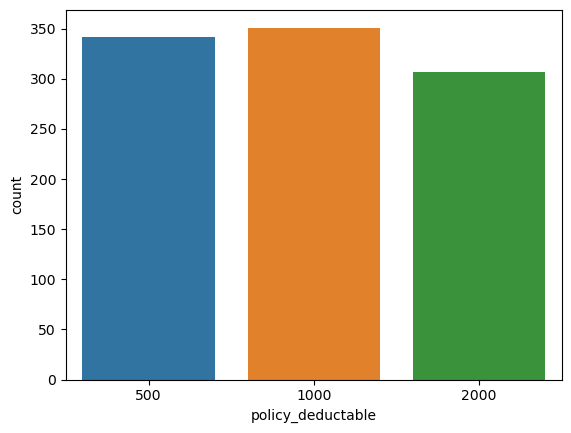

In [42]:
# visualize the number of  policy_deductable
ax=sns.countplot(x='policy_deductable',data=df)
print(df['policy_deductable'].value_counts())

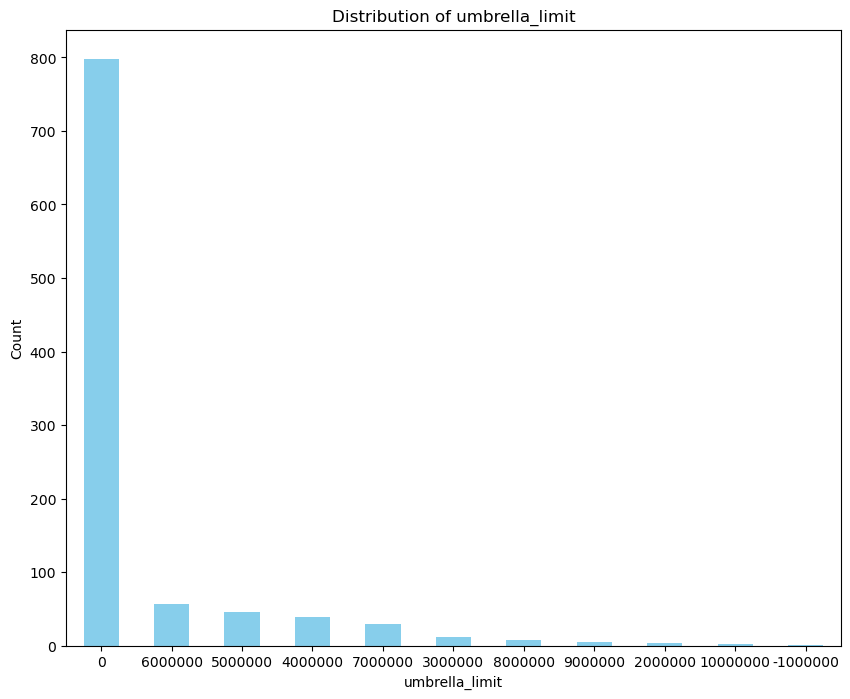

In [43]:
# Assuming df is your DataFrame and it has a column named 'umbrella_limit'
umbrella_limit = df["umbrella_limit"].value_counts()

plt.figure(figsize=(10,8))
umbrella_limit.plot(kind='bar', color='Skyblue')
plt.title("Distribution of umbrella_limit")
plt.xlabel("umbrella_limit")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

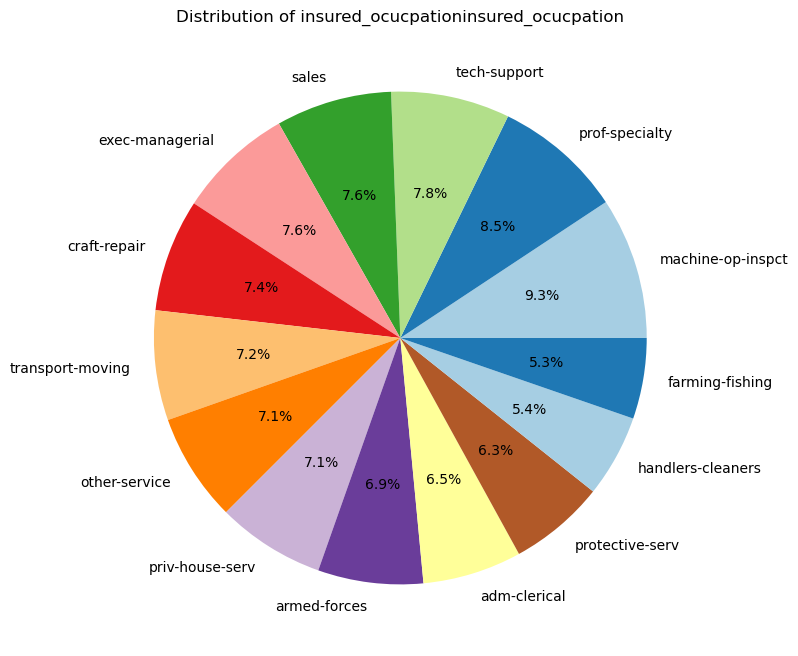

In [44]:
# Assuming df is your DataFrame and it has a column named 'insured_ocucpation'
insured_ocucpation = df["insured_ocucpation"].value_counts()

plt.figure(figsize=(10,8))
insured_ocucpation.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of insured_ocucpationinsured_ocucpation")
plt.ylabel("")  # Hide the y-label

plt.show()

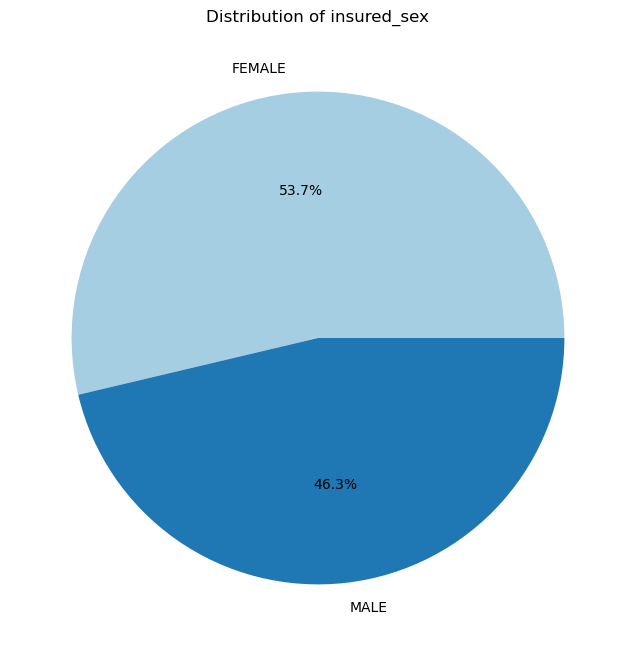

In [45]:
# Assuming df is your DataFrame and it has a column named 'insured_sex'
insured_sex = df["insured_sex"].value_counts()

plt.figure(figsize=(10,8))
insured_sex.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of insured_sex")
plt.ylabel("")  # Hide the y-label

plt.show()

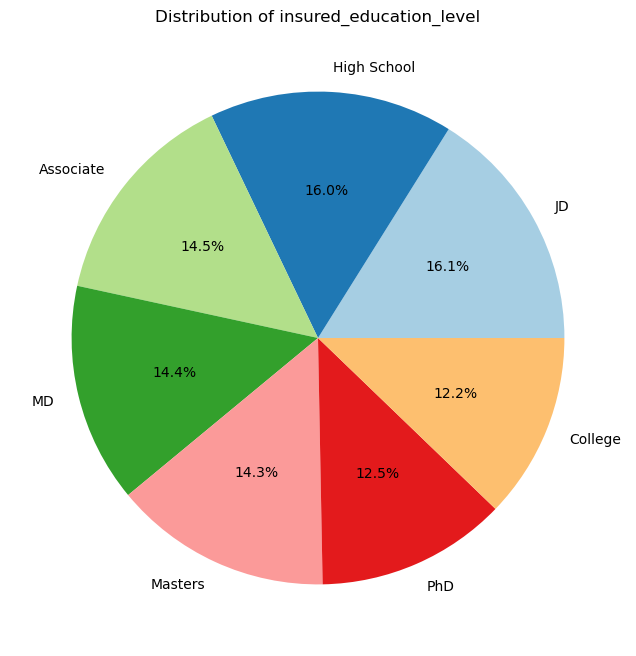

In [46]:
# Assuming df is your DataFrame and it has a column named 'insured_education_level'
insured_education_level = df["insured_education_level"].value_counts()

plt.figure(figsize=(10,8))
insured_education_level.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of insured_education_level")
plt.ylabel("")  # Hide the y-label

plt.show()

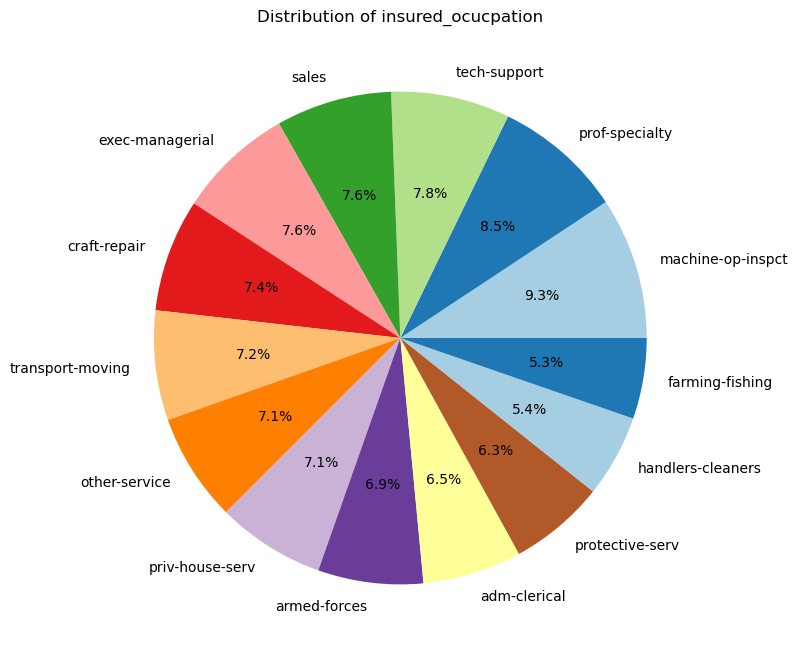

In [47]:
# Assuming df is your DataFrame and it has a column named 'insured_ocucpation'
insured_ocucpation = df["insured_ocucpation"].value_counts()

plt.figure(figsize=(10,8))
insured_ocucpation.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of insured_ocucpation")
plt.ylabel("")  # Hide the y-label

plt.show()

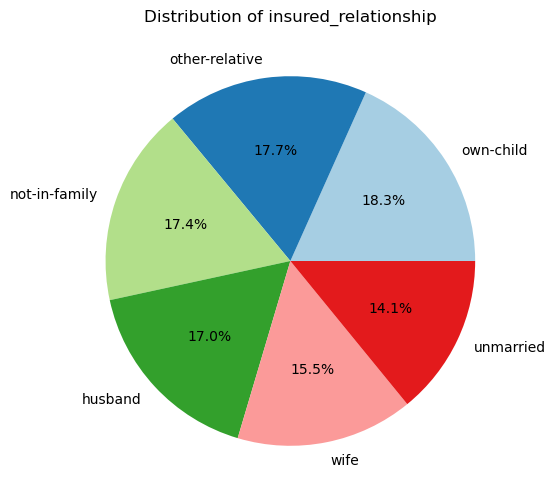

In [48]:
# Assuming df is your DataFrame and it has a column named 'insured_relationship'
insured_relationship = df["insured_relationship"].value_counts()

plt.figure(figsize=(8,6))
insured_relationship.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of insured_relationship")
plt.ylabel("")  # Hide the y-label

plt.show()

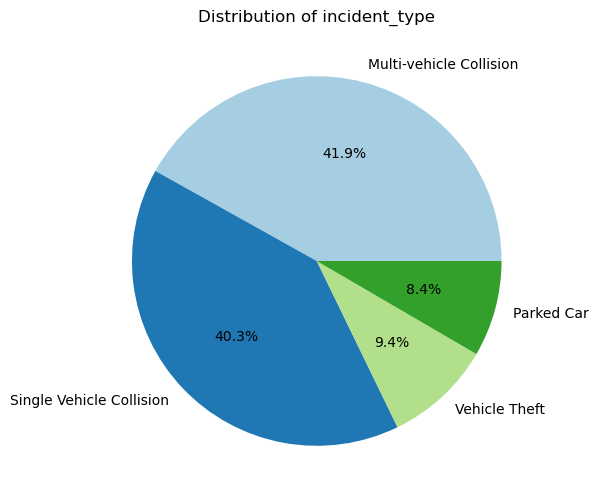

In [49]:
# Assuming df is your DataFrame and it has a column named 'incident_type'
incident_type = df["incident_type"].value_counts()

plt.figure(figsize=(8,6))
incident_type.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of incident_type")
plt.ylabel("")  # Hide the y-label

plt.show()

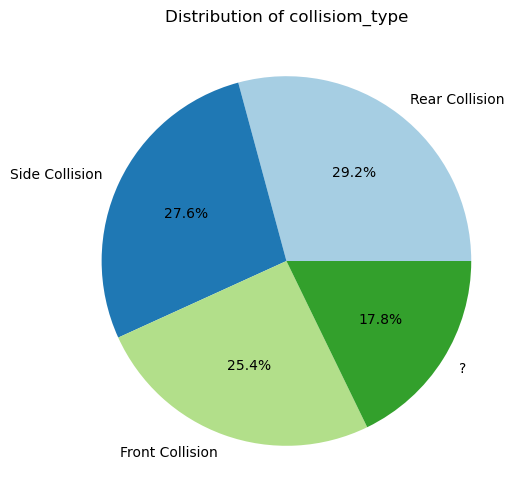

In [50]:
# Assuming df is your DataFrame and it has a column named 'collisiom_type'
incident_type = df["collisiom_type"].value_counts()

plt.figure(figsize=(8,6))
incident_type.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of collisiom_type")
plt.ylabel("")  # Hide the y-label

plt.show()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incient_sverity, dtype: int64


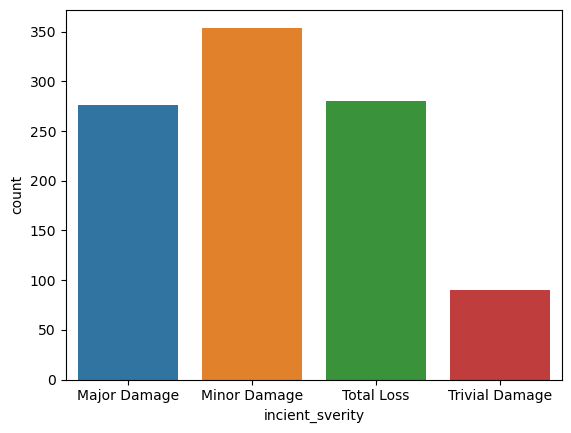

In [51]:
# visualize the number of  incient_sverity
ax=sns.countplot(x='incient_sverity',data=df)
print(df['incient_sverity'].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


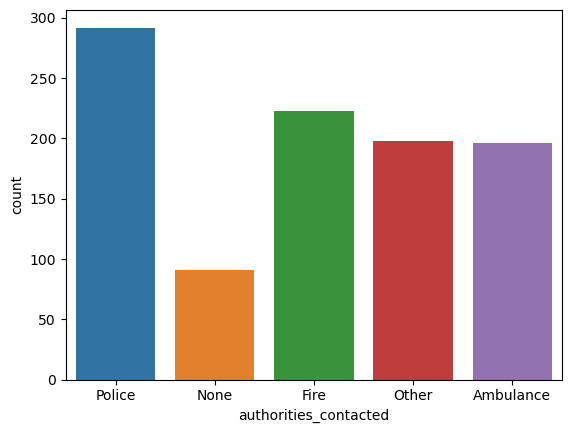

In [52]:
# visualize the number of  authorities_contacted
ax=sns.countplot(x='authorities_contacted',data=df)
print(df['authorities_contacted'].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


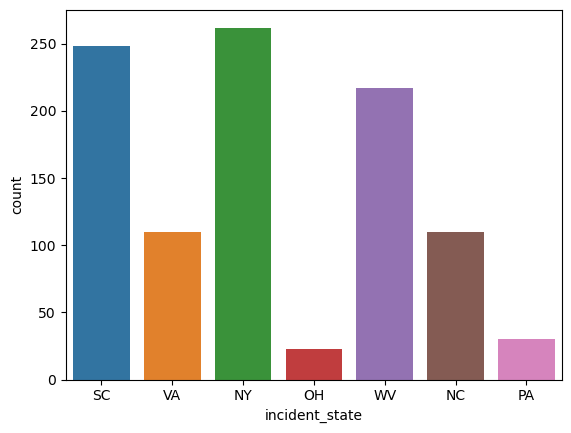

In [53]:
# visualize the number of  incident_state
ax=sns.countplot(x='incident_state',data=df)
print(df['incident_state'].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


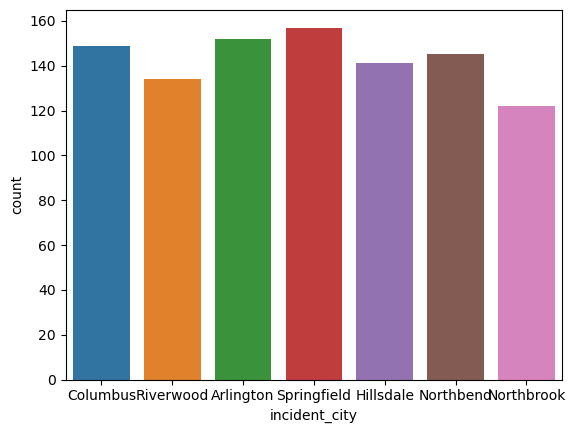

In [54]:
# visualize the number of  incident_city
ax=sns.countplot(x='incident_city',data=df)
print(df['incident_city'].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


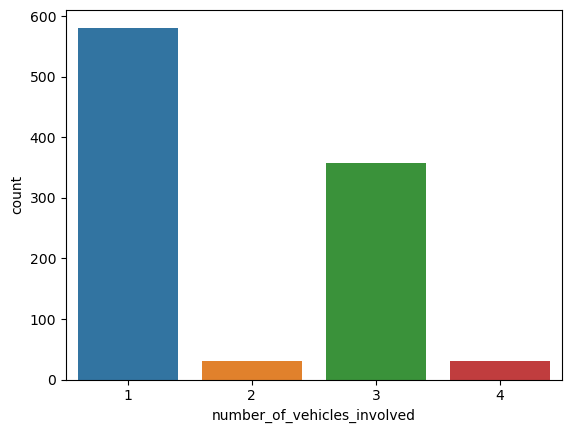

In [55]:
# visualize the number of  number_of_vehicles_involved
ax=sns.countplot(x='number_of_vehicles_involved',data=df)
print(df['number_of_vehicles_involved'].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


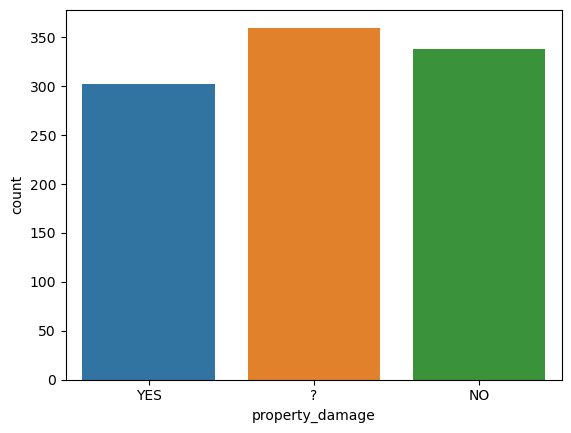

In [56]:
# visualize the number of  property_damage
ax=sns.countplot(x='property_damage',data=df)
print(df['property_damage'].value_counts())

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


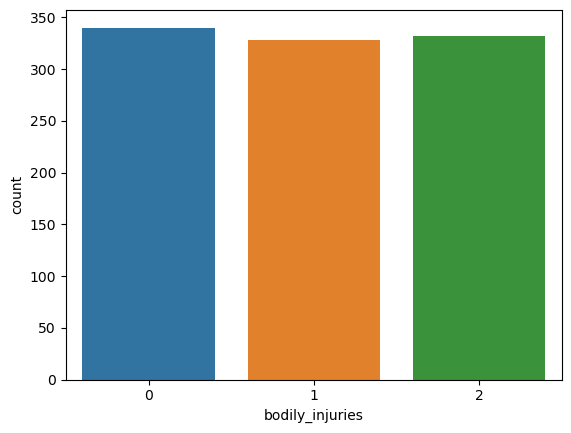

In [57]:
# visualize the number of  bodily_injuries
ax=sns.countplot(x='bodily_injuries',data=df)
print(df['bodily_injuries'].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


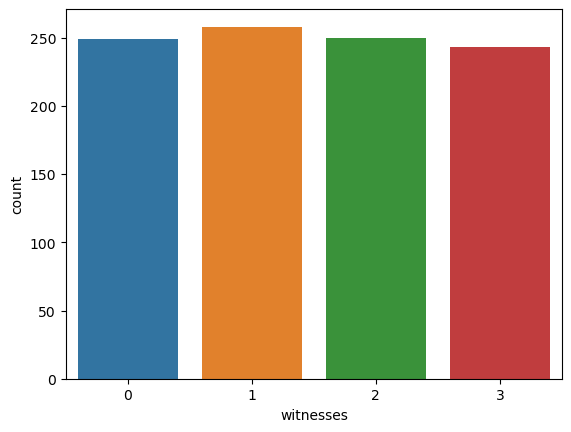

In [58]:
# visualize the number of  witnesses
ax=sns.countplot(x='witnesses',data=df)
print(df['witnesses'].value_counts())

?      343
NO     343
YES    314
Name: police_report_avialble, dtype: int64


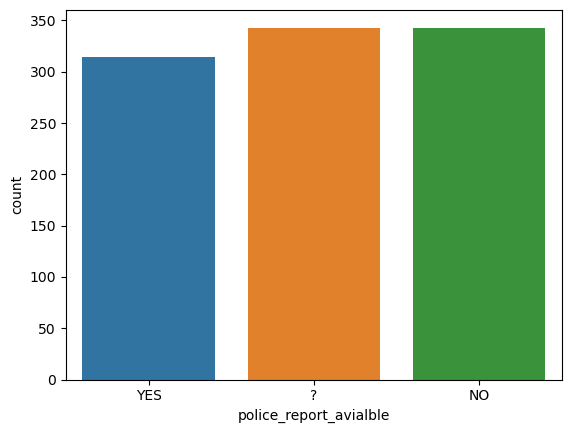

In [59]:
# visualize the number of  police_report_avialble
ax=sns.countplot(x='police_report_avialble',data=df)
print(df['police_report_avialble'].value_counts())

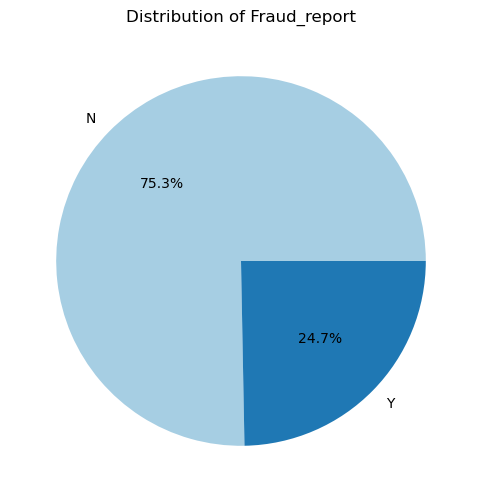

In [60]:
# Assuming df is your DataFrame and it has a column named 'Fraud_report'
incident_type = df["Fraud_report"].value_counts()

plt.figure(figsize=(8,6))
incident_type.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Fraud_report")
plt.ylabel("")  # Hide the y-label

plt.show()

# Relational Analysis

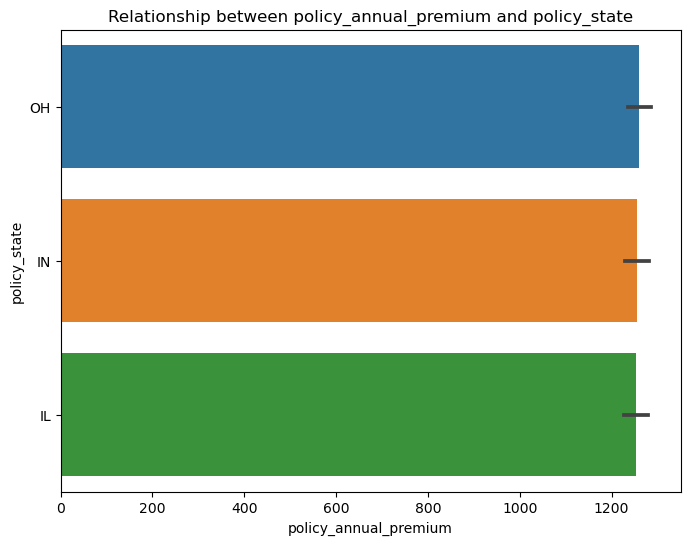

In [61]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="policy_annual_premium", y="policy_state", data=df)

# Set labels and title
plt.xlabel("policy_annual_premium")
plt.ylabel("policy_state")
plt.title("Relationship between policy_annual_premium and policy_state")

# Show the plot
plt.show()

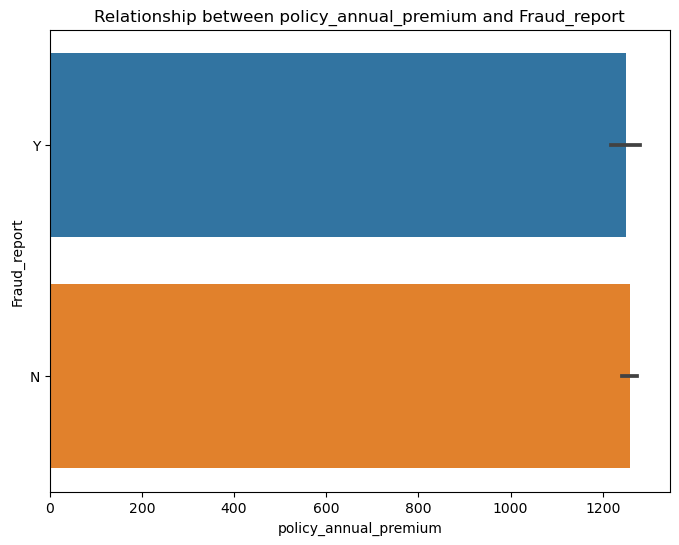

In [62]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="policy_annual_premium", y="Fraud_report", data=df)

# Set labels and title
plt.xlabel("policy_annual_premium")
plt.ylabel("Fraud_report")
plt.title("Relationship between policy_annual_premium and Fraud_report")

# Show the plot
plt.show()

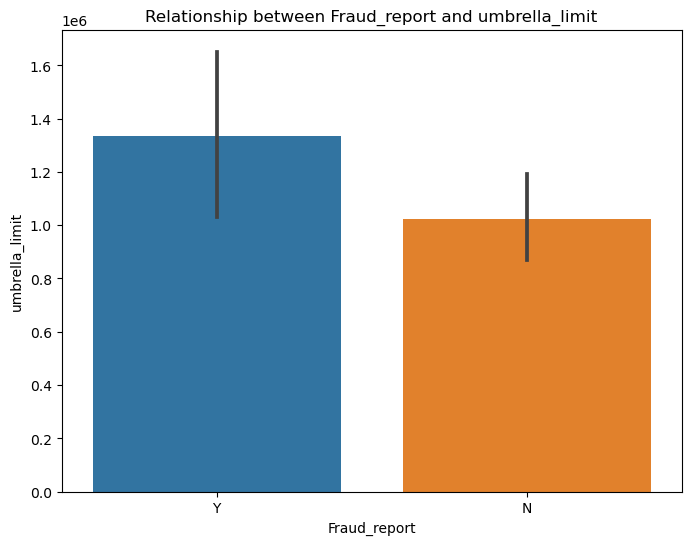

In [63]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Fraud_report", y="umbrella_limit", data=df)

# Set labels and title
plt.xlabel("Fraud_report")
plt.ylabel("umbrella_limit")
plt.title("Relationship between Fraud_report and umbrella_limit")

# Show the plot
plt.show()

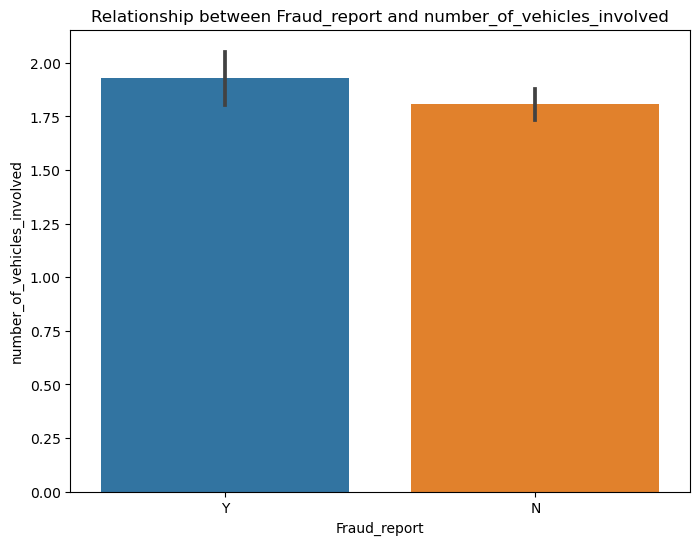

In [64]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Fraud_report", y="number_of_vehicles_involved", data=df)

# Set labels and title
plt.xlabel("Fraud_report")
plt.ylabel("number_of_vehicles_involved")
plt.title("Relationship between Fraud_report and number_of_vehicles_involved")

# Show the plot
plt.show()

# Checking For outliers

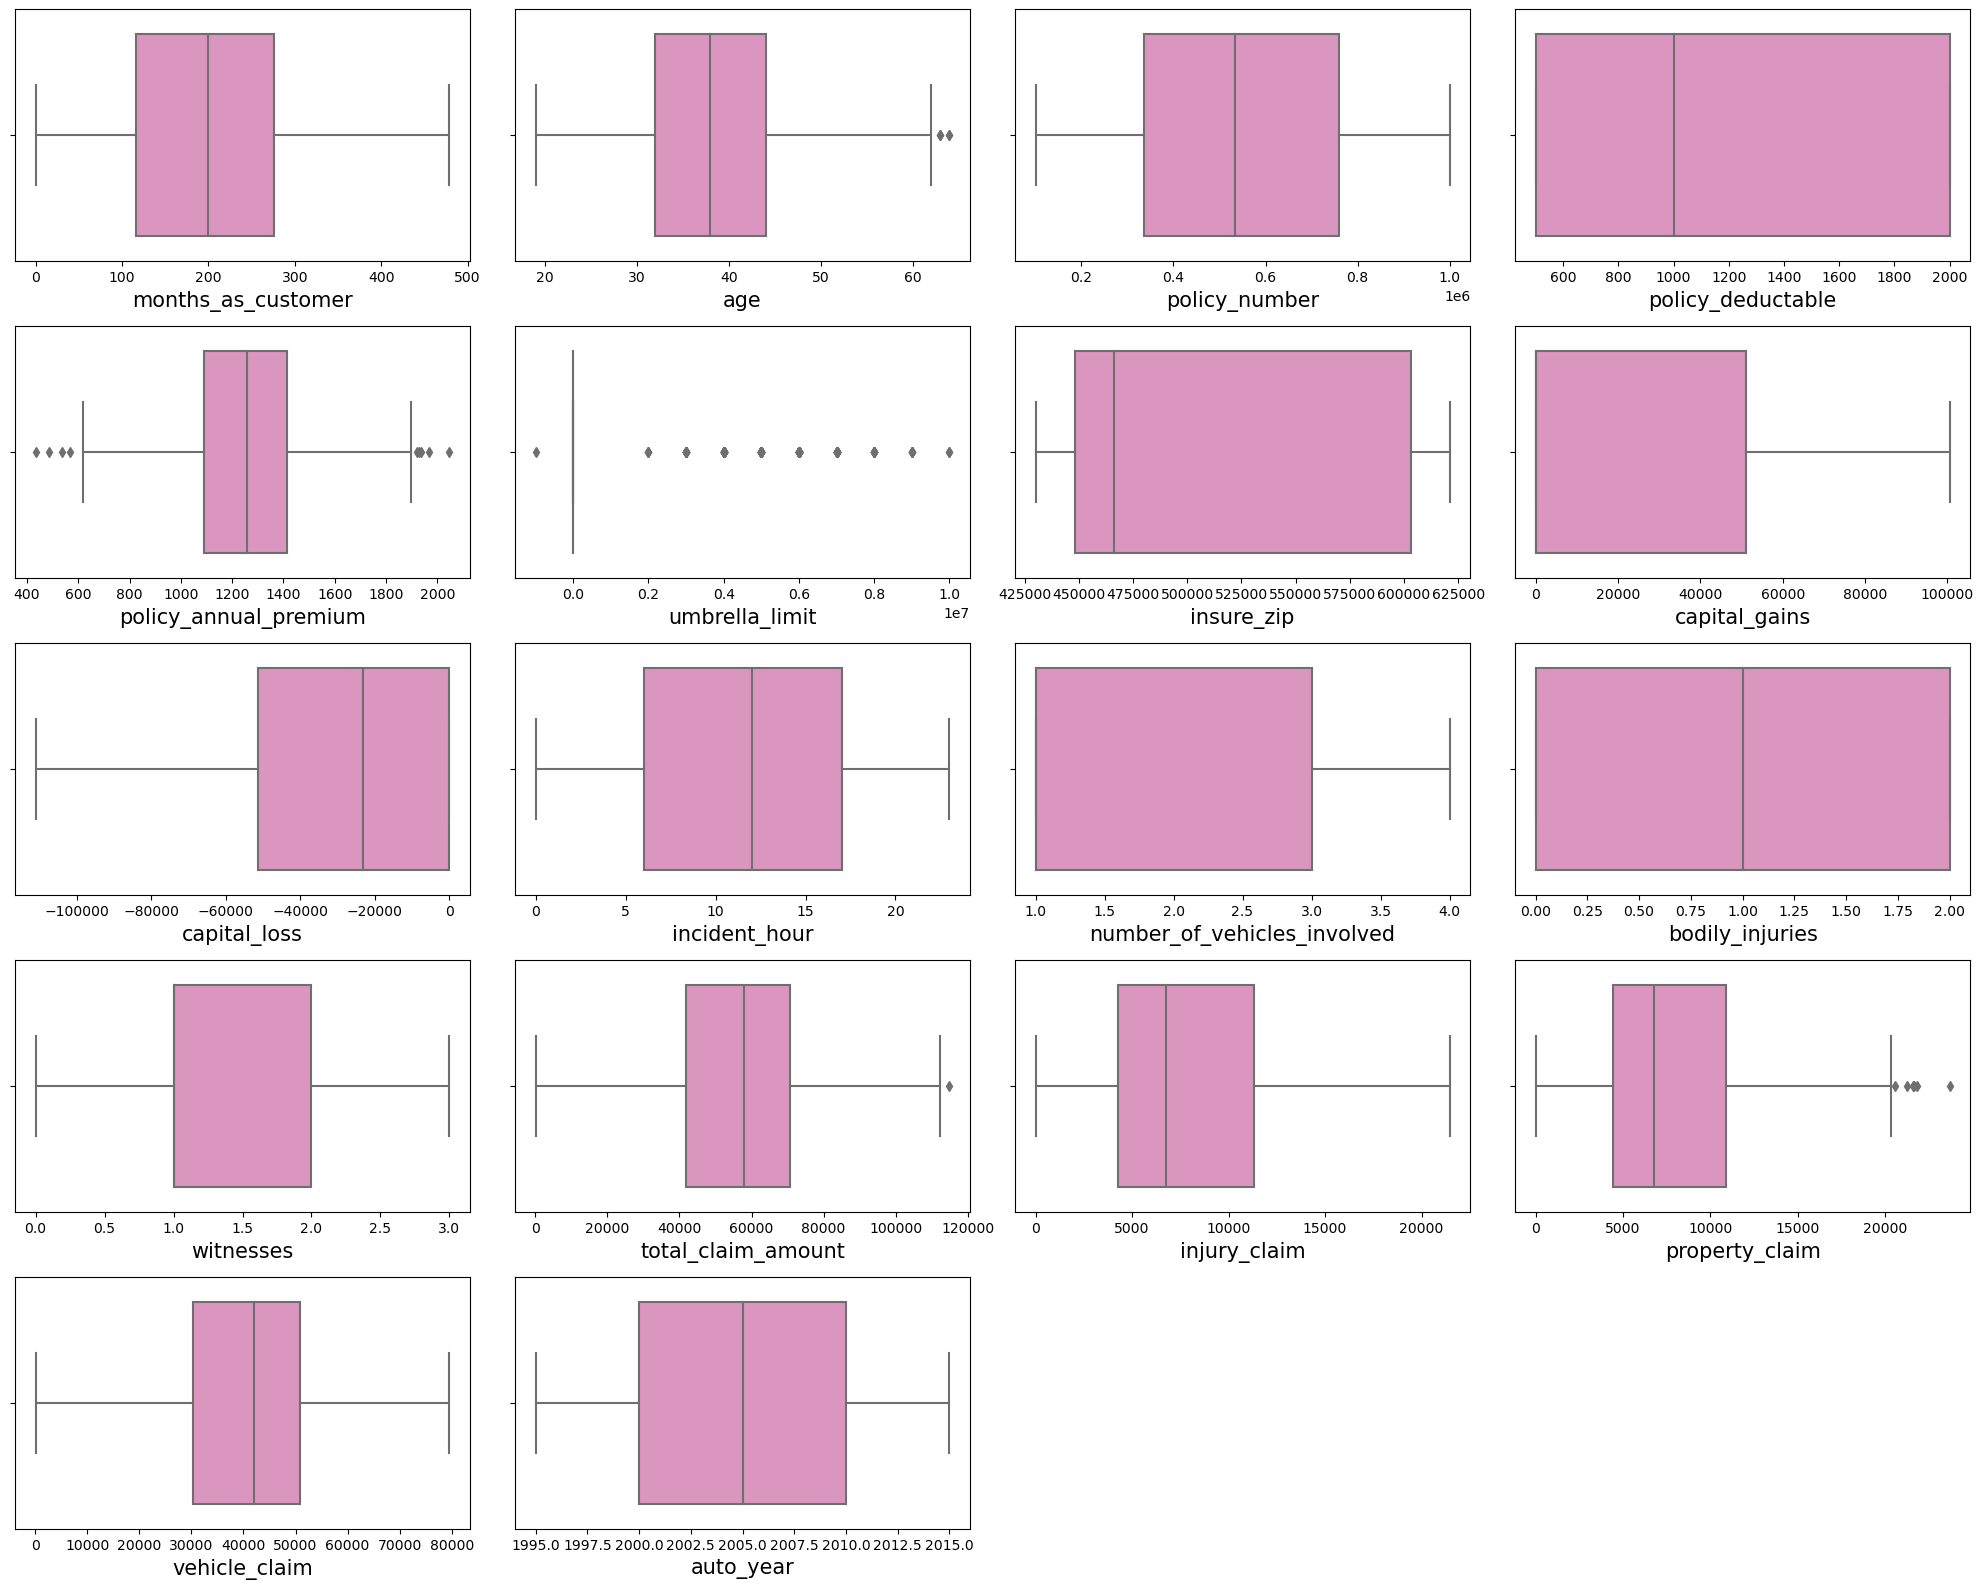

In [65]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

# Usng IQR method removed outliers

In [66]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['age', 'policy_annual_premium','total_claim_amount','property_claim']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
     months_as_customer  age  policy_number policy_state policy_csl  \
0                   328   48         521585           OH    250/500   
1                   228   42         342868           IN    250/500   
2                   134   29         687698           OH    100/300   
3                   256   41         227811           IL    250/500   
4                   228   44         367455           IL   500/1000   
..                  ...  ...            ...          ...        ...   
995                   3   38         941851           OH   500/1000   
996                 285   41         186934           IL    100/300   
997                 130   34         918516           OH    250/500   
998                 458   62         533940           IL   500/1000   
999                 456   60         556080           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insure_zip  \
0                 1000             

# Ordinal Encoder

In [67]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
OE = OrdinalEncoder()

# Dictionary to store mappings for each categorical column
mappings = {}

# Encoding categorical columns
for col in df1.columns:
    if df1[col].dtypes == "object":
        original_values = df1[col].unique()
        df1[col] = OE.fit_transform(df1[col].values.reshape(-1, 1))
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df1)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
      months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585           2.0         1.0   
1                   228   42         342868           1.0         1.0   
2                   134   29         687698           2.0         0.0   
3                   256   41         227811           0.0         1.0   
4                   228   44         367455           0.0         2.0   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851           2.0         2.0   
996                 285   41         186934           0.0         0.0   
997                 130   34         918516           2.0         1.0   
998                 458   62         533940           0.0         2.0   
999                 456   60         556080           2.0         1.0   

     policy_deductable  policy_annual_premium  umbrella_limit  insure_zip  \
0                 1000    

# Cheking how the data is distributed

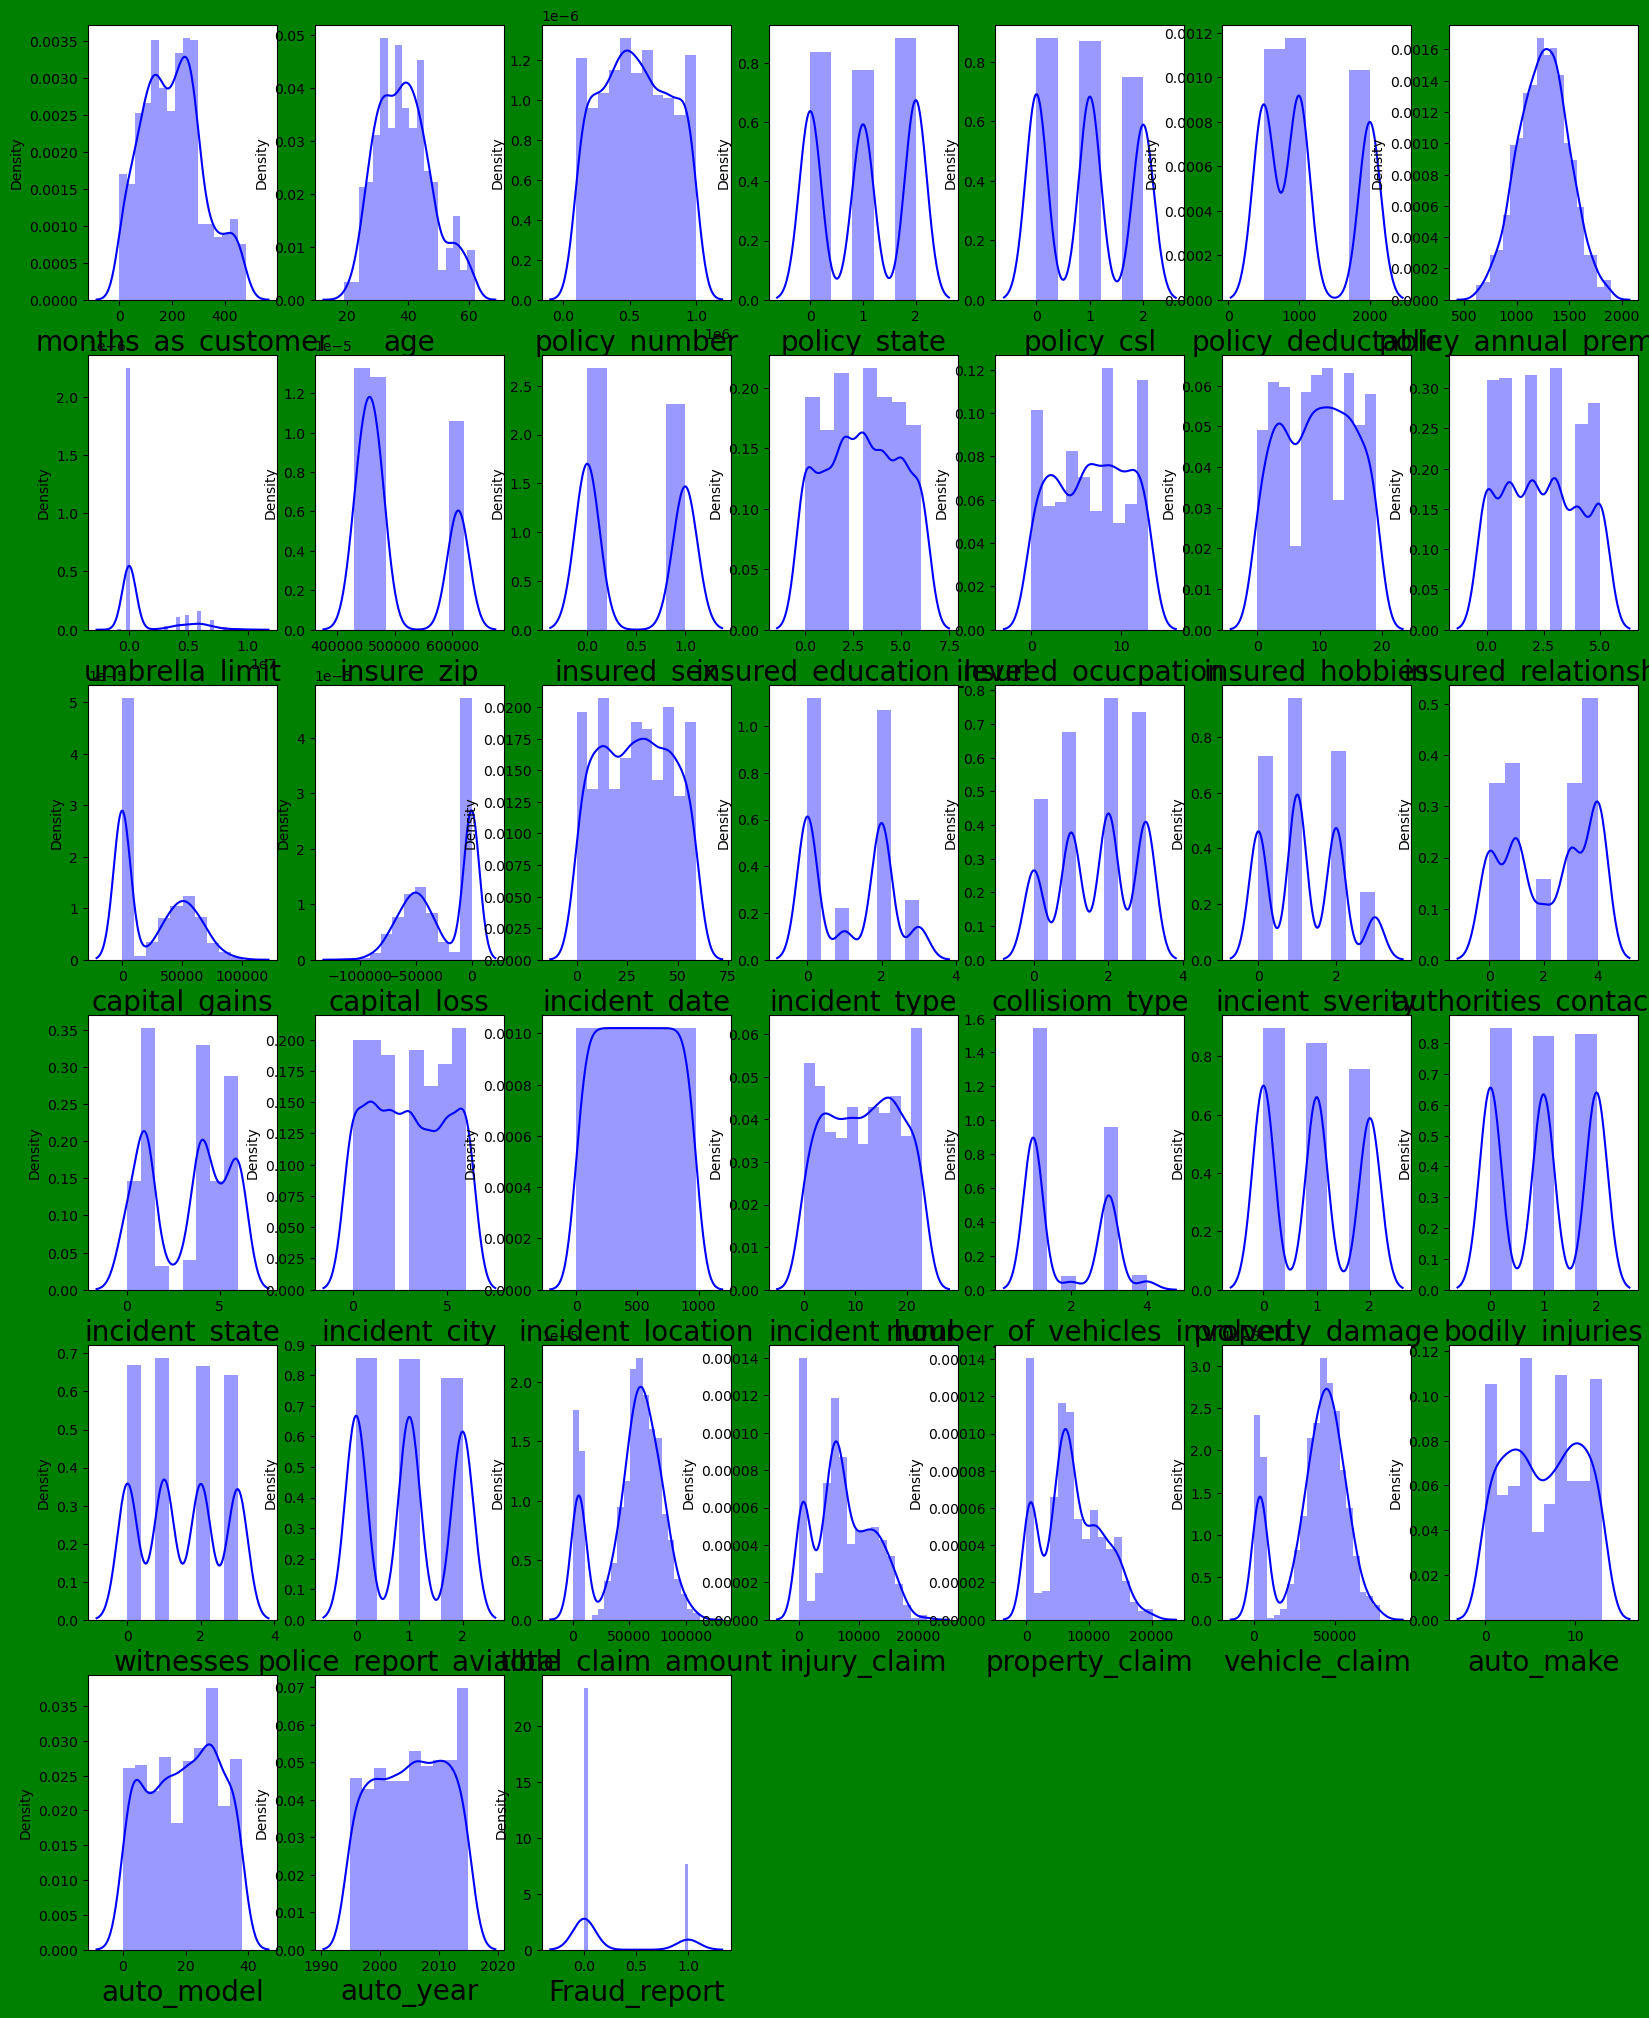

In [68]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df1:
    if plotnumber <= 40:
        ax =plt.subplot(6,7,plotnumber)
        sns.distplot(df1[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

In [69]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

months_as_customer             0.338883
age                            0.436437
policy_number                  0.033911
policy_state                  -0.036226
policy_csl                     0.094701
policy_deductable              0.467802
policy_annual_premium         -0.001956
umbrella_limit                 1.808528
insure_zip                     0.843034
insured_sex                    0.147563
insured_education_level        0.003617
insured_ocucpation            -0.063267
insured_hobbies               -0.040032
insured_relationship           0.077422
capital_gains                  0.478946
capital_loss                  -0.389995
incident_date                  0.007269
incident_type                  0.105918
collisiom_type                -0.191514
incient_sverity                0.272993
authorities_contacted         -0.124697
incident_state                -0.139782
incident_city                  0.044619
incident_location              0.000000
incident_hour                 -0.033970


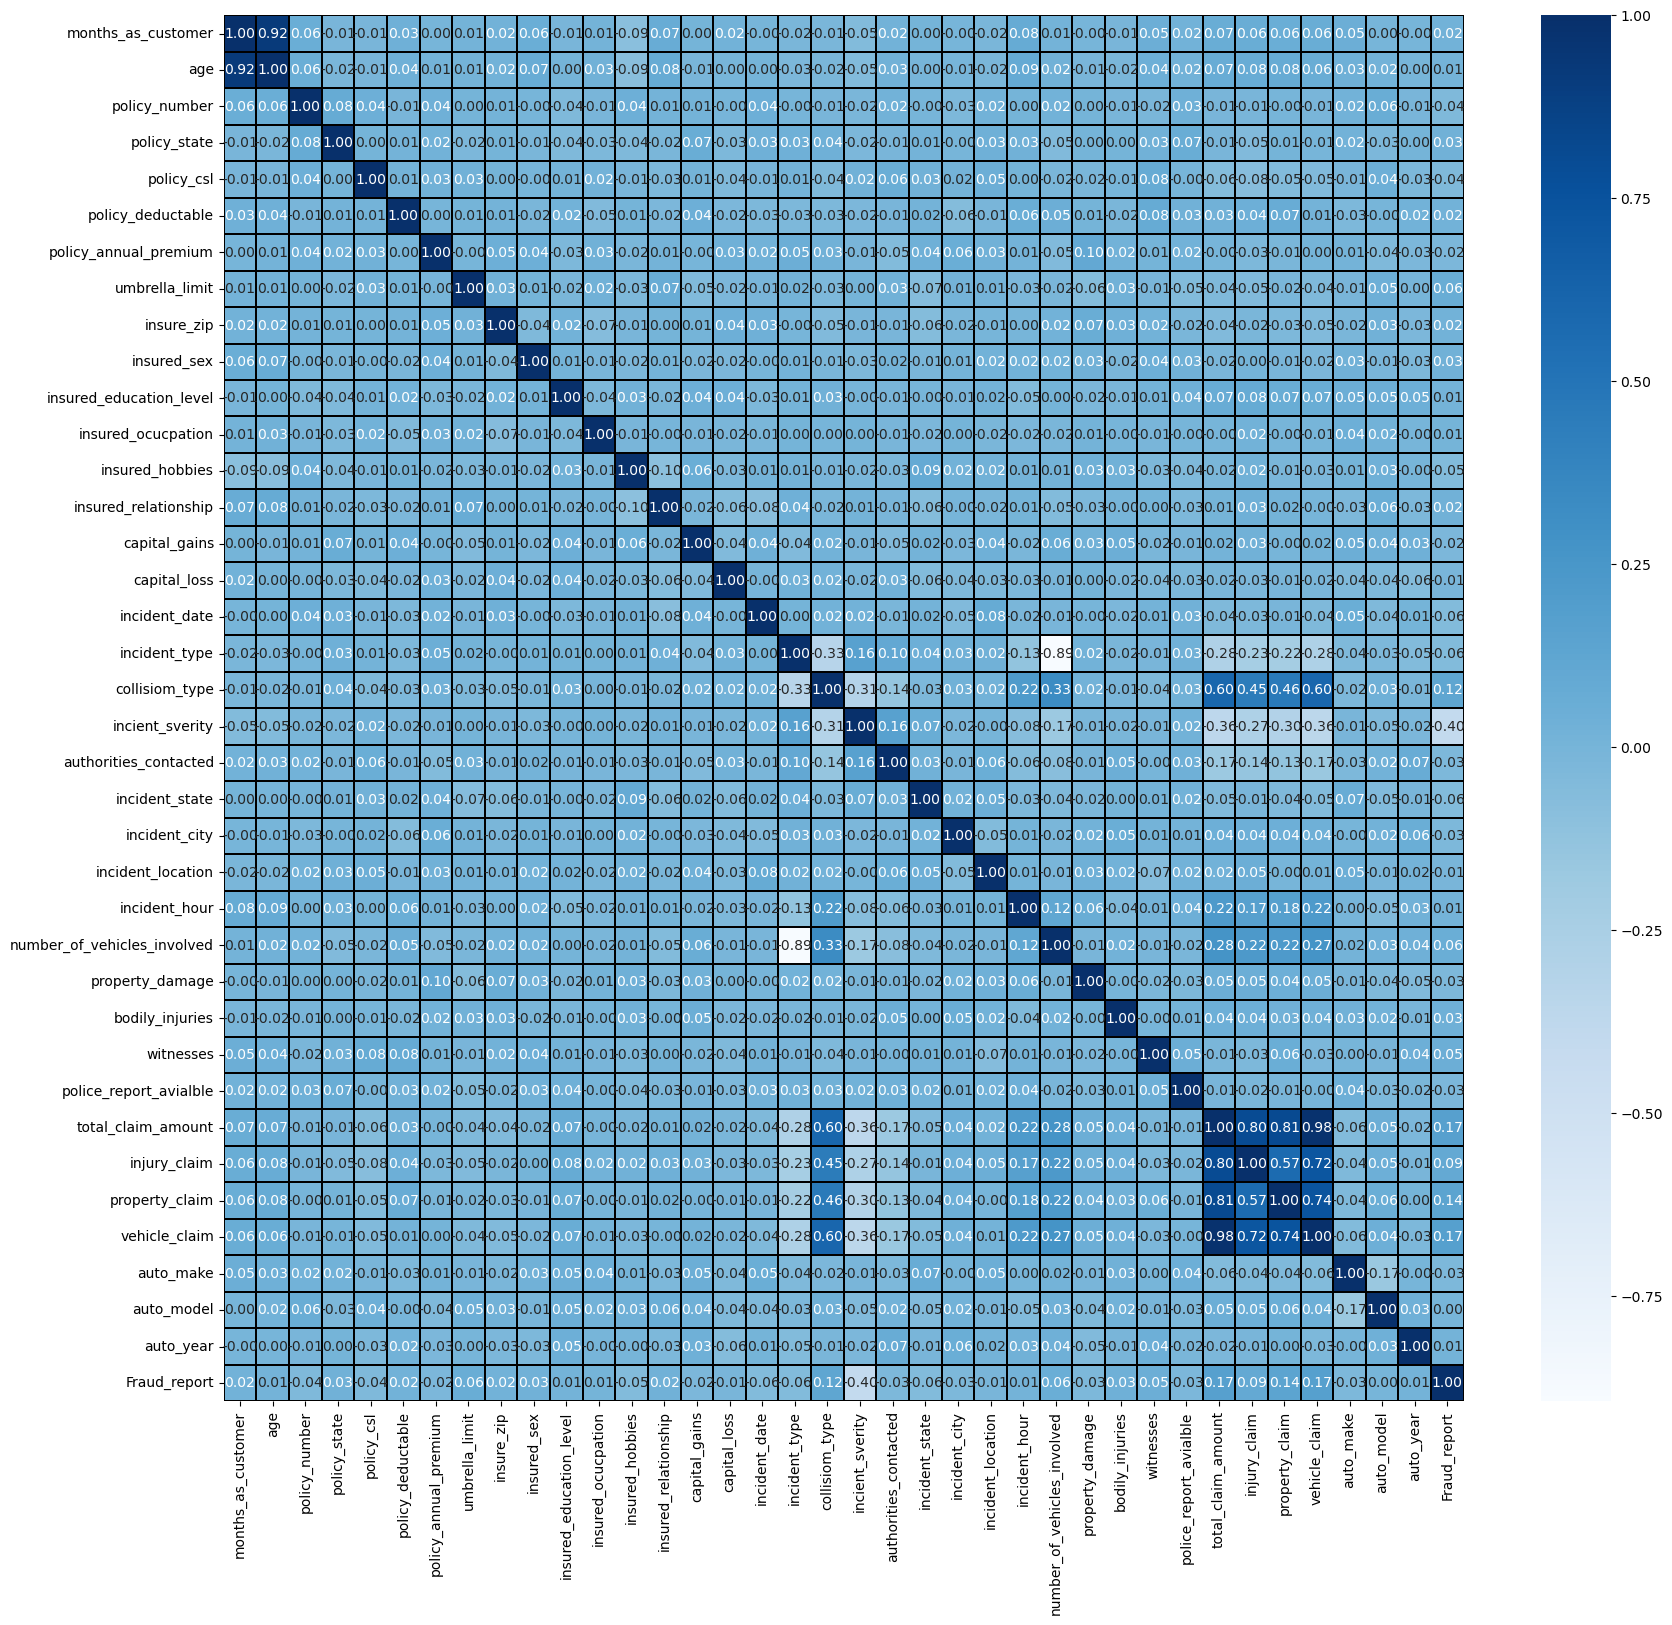

In [70]:
# Set the figure size
plt.figure(figsize=(20,18))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

Almost all columns looks good

# Split the target features

In [71]:
# Separating the independent and target varaible into x and y
x = df1.drop(['Fraud_report'], axis=1)  # Features we remove Fraud_reportFraud_report columns
y = df1['Fraud_report']    #  Here now the Fraud_report is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (980, 37)
Label Dimensions (980,)


In [72]:
y.value_counts()

0.0    739
1.0    241
Name: Fraud_report, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

# Reduce the number of neighbors to avoid the error
SM = SMOTE(k_neighbors=4)  # Adjust k_neighbors based on your minority class size
x1, y1 = SM.fit_resample(x, y)

In [74]:
y1.value_counts()

1.0    739
0.0    739
Name: Fraud_report, dtype: int64

# Classification Algorithm

In [75]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Find the best random state and max accuracy

In [76]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 100):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the ExtraTreesClassifier
    ETC = ExtraTreesClassifier()
    ETC.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = ETC.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

In [77]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.9211711711711712 at random_state 75


Here you can see that 94 % accuracy .

# Creating train test split

In [78]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=maxRS)

# Random Forest Classifier

In [79]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.8986486486486487
Confusion Matrix:
[[203  22]
 [ 23 196]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       225
         1.0       0.90      0.89      0.90       219

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



# Support Vector Machine Classifier

In [80]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.5135135135135135
Confusion Matrix:
[[ 91 134]
 [ 82 137]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.40      0.46       225
         1.0       0.51      0.63      0.56       219

    accuracy                           0.51       444
   macro avg       0.52      0.52      0.51       444
weighted avg       0.52      0.51      0.51       444



# Gradient Boosting Classifier

In [81]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)  
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.8941441441441441
Confusion Matrix:
[[200  25]
 [ 22 197]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       225
         1.0       0.89      0.90      0.89       219

    accuracy                           0.89       444
   macro avg       0.89      0.89      0.89       444
weighted avg       0.89      0.89      0.89       444



# Ada Boost Classifier

In [82]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.8603603603603603
Confusion Matrix:
[[194  31]
 [ 31 188]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       225
         1.0       0.86      0.86      0.86       219

    accuracy                           0.86       444
   macro avg       0.86      0.86      0.86       444
weighted avg       0.86      0.86      0.86       444



# Extra Trees Classifier

In [83]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.9054054054054054
Confusion Matrix:
[[198  27]
 [ 15 204]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       225
         1.0       0.88      0.93      0.91       219

    accuracy                           0.91       444
   macro avg       0.91      0.91      0.91       444
weighted avg       0.91      0.91      0.91       444



After checking each algorithm, it was found that Extra Tree Classifier is the best algorithm.

Now we find best hyper parameter

# Hyper parameter Tunings

In [84]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'criterion':['gini','entropy'],
              'random_state':[10,50,1000],
              'max_depth': [0,10,20],  
              'n_jobs':[-2,-1,1],
              'n_estimators' : [50,100,200,300]} 

In [85]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [87]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [88]:
Model = ExtraTreesClassifier(criterion = "entropy" , max_depth = 20,n_jobs = -2,random_state = 50,n_estimators = 100)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

89.41441441441441


# Saving the model using joblib

In [89]:
# Saving the model
import joblib
joblib.dump(Model,"insurance_claim.pkl")

['insurance_claim.pkl']

In [90]:
import pickle
filename = "insurance_claim.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicting the saved model

In [91]:
load_model = pickle.load(open("insurance_claim.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

89.41441441441441


This is my overall prediction

# THANK YOU